In [13]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
IMG_SIZE=145
BATCH_SIZE=16
SEED=42

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    #zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    horizontal_flip=False,
    validation_split=0.2
)

train_generator=train_datagen.flow_from_directory(
    "../../data/processed/01_kaggle_dataset/cropped_dataset_MediaPipe/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED,
    subset="training"
)

validation_generator=train_datagen.flow_from_directory(
    "../../data/processed/01_kaggle_dataset/cropped_dataset_MediaPipe/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=SEED,
    subset="validation"
)

Found 1975 images belonging to 4 classes.
Found 492 images belonging to 4 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(256, 3, activation="relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))  # 4 classes

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# EarlyStopping: val_loss가 patience만큼 개선되지 않으면 멈춤
esc=EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# ModelCheckpoint: val_loss가 가장 낮은 시점마다 모델 저장
model_checkpoint=ModelCheckpoint("../../src/models/01_Basic_Model/best_drowsiness_model.keras",
                                monitor="val_loss", save_best_only=True, save_weights_only=False,
                                mode='min', verbose=1)

history=model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[esc, model_checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4429 - loss: 1.1343
Epoch 1: val_loss improved from inf to 0.45596, saving model to /content/drive/MyDrive/Colab Notebooks/vision_project/drowsiness_cls_project/best_drowsiness_model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 640s 5s/step - accuracy: 0.4442 - loss: 1.1319 - val_accuracy: 0.8577 - val_loss: 0.4560
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8732 - loss: 0.3391
Epoch 2: val_loss improved from 0.45596 to 0.34150, saving model to /content/drive/MyDrive/Colab Notebooks/vision_project/drowsiness_cls_project/best_drowsiness_model.keras
124/124 ━━━━━━━━━━━━━━━━━━━━ 625s 5s/step - accuracy: 0.8734 - loss: 0.3388 - val_accuracy: 0.8923 - val_loss: 0.3415
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9314 - loss: 0.2062
Epoch 3: val_loss improved from 0.34150 to 0.21209, saving model to /content/drive/MyDrive/Colab Notebooks/vision_project/drowsiness_cls_project/best_drowsiness_model.

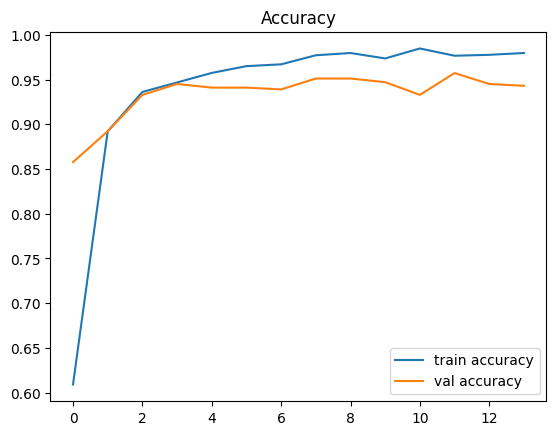

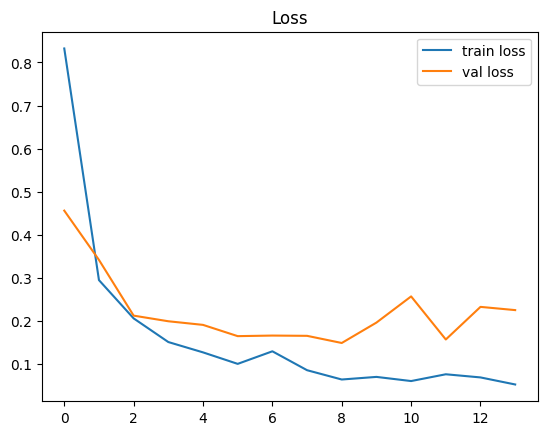

In [ ]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="val accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")
plt.show()

In [ ]:
model.save("../../src/models/01_Basic_Model/drowsiness_mediapipe_model_first.keras")